<a href="https://colab.research.google.com/github/RippaHakki/a/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("fighters.csv", header=None)

In [33]:
# Пример данных: "Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexicorene alvarado,32,8,0,52.5%,Orthodox,33,5.58 ft (1.70 m),72.05 inches (183 cm),Nicaragua..."
# Назначаем заголовки столбцов
columns = ["Name", "Wins", "Losses", "Draws", "K.O. Percentage", "Stance", "Age", "Height_ft", "Reach_in", "Country"]
df.columns = columns

# Удаляем лишние символы и преобразуем числовые столбцы
df["K.O. Percentage"] = df["K.O. Percentage"].str.replace("%", "").astype(float)
df["Height_ft"] = df["Height_ft"].str.extract(r'(\d+\.\d+)').astype(float)
df["Reach_in"] = df["Reach_in"].str.extract(r'(\d+\.\d+)').astype(float)

In [34]:
# Кодирование стойки (Orthodox=0, Southpaw=1)
df["Stance"] = LabelEncoder().fit_transform(df["Stance"])

# Кодирование стран (One-Hot Encoding)
df = pd.get_dummies(df, columns=["Country"], prefix="Country")

In [35]:
# Создаем целевую переменную: высокий (>50%) или низкий процент побед
df["High_Win_Rate"] = df["K.O. Percentage"] > 50

In [36]:
# Выбираем признаки
features = ["Wins", "Losses", "Draws", "Stance", "Age", "Height_ft", "Reach_in"] + list(df.filter(like="Country_").columns)
X = df[features]
y = df["High_Win_Rate"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Обучение модели
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6517857142857143
              precision    recall  f1-score   support

       False       0.61      0.65      0.63        51
        True       0.69      0.66      0.67        61

    accuracy                           0.65       112
   macro avg       0.65      0.65      0.65       112
weighted avg       0.65      0.65      0.65       112



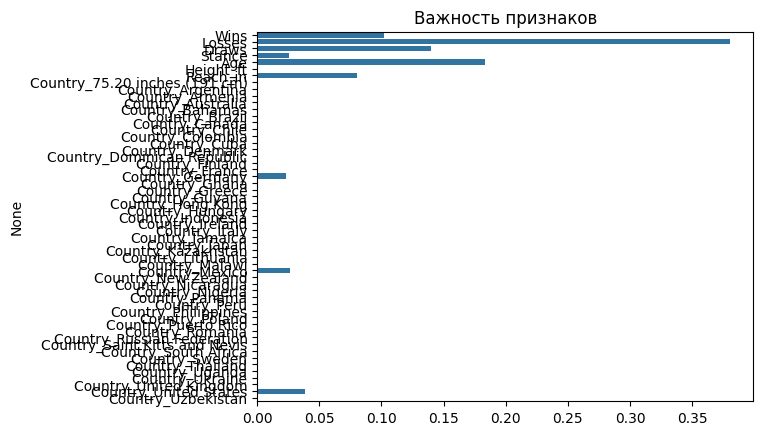

In [42]:
# Визуализация важности признаков
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Важность признаков")
plt.show()